In [1]:
# Google Colab에서 Google Drive를 사용하기 위한 라이브러리를 가져옵니다.
from google.colab import drive

# Google Drive를 Colab 환경에 마운트하여 데이터를 읽거나 쓸 수 있도록 설정합니다.
# '/content/drive' 경로로 Google Drive의 파일을 접근할 수 있게 됩니다.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Nanum 폰트 설치
!apt-get -qq -y install fonts-nanum > /dev/null  # 시스템에 나눔 폰트를 설치

# 나눔 폰트를 matplotlib에 추가하기 위한 설정
fe = fm.FontEntry(
    fname=r'/usr/share/truetype/nanum/NanumBarunGothic.ttf',  # 설치된 나눔 폰트 파일의 경로
    name='NanumGothic'  # matplotlib에서 사용할 폰트 이름
)

fm.fontManager.ttflist.insert(0, fe)  # Matplotlib의 폰트 목록에 나눔 폰트를 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})  # 폰트를 기본 설정으로 지정

# 런타임을 재시작하는 코드 (Google Colab에서는 폰트 적용을 위해 필요)
import os
os.kill(os.getpid(), 9)  # 현재 실행 중인 프로세스를 종료하여 런타임을 재시작

In [2]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False  # matplotlib에서 음수 부호가 깨지는 문제를 해결

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/truetype/nanum/NanumBarunGothic.ttf',  # 설치된 나눔 폰트 파일의 경로
    name='NanumGothic'  # matplotlib에서 사용할 폰트 이름
)

# Matplotlib의 폰트 매니저에 나눔 폰트를 추가
fm.fontManager.ttflist.insert(0, fe)

# matplotlib의 기본 글꼴 및 크기 설정
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})  # 폰트를 'NanumGothic'으로 설정

In [3]:
# 필요한 라이브러리 import
import requests  # HTTP 요청을 보내기 위한 라이브러리
import pandas as pd  # 데이터를 다루기 위한 Pandas 라이브러리

# API Key 및 기본 URL 설정
key = "nU91IArDV1nZa26hpdkr93hasKwZtT77uqmGGR+EGkllr7N/ry9RGLF/BP0pj6C48yfDIGhTqmkk1+scSFTjPQ=="
base_url = "http://apis.data.go.kr/1471000/QdrgProdIprtPfmc/getQdrgProdIprtPfmc"

# API 요청에 사용할 파라미터 설정
params = {
    'serviceKey': key,  # 인증 키
    'type': 'json',  # 응답 형식
    'numOfRows': 100,  # 한 번에 가져올 데이터 수
    'pageNo': 1        # 시작 페이지
}

# 전체 데이터를 저장할 리스트 초기화
all_data = []

while True:
    # API 호출
    response = requests.get(base_url, params=params, verify=False)

    # 응답 상태 확인
    if response.status_code == 200:
        # JSON 응답 데이터를 파싱
        data = response.json()

        # JSON 구조에서 body 및 items 추출
        body = data.get("body", {})
        items = body.get("items", [])

        # items가 리스트인지 확인하고 데이터 추가
        if isinstance(items, list):
            all_data.extend(items)  # 리스트일 경우 데이터를 확장
        else:
            # 예기치 않은 데이터 형식 처리
            print("Unexpected items format:", type(items))
            break

        # Pagination 처리
        total_count = body.get("totalCount", 0)  # 전체 데이터 개수 가져오기
        if params["pageNo"] * params["numOfRows"] >= total_count:
            # 현재 페이지 번호와 데이터 수를 곱했을 때 전체 데이터보다 크면 종료
            break

        # 다음 페이지로 이동
        params["pageNo"] += 1
    else:
        # 오류 발생 시 상태 코드와 응답 메시지 출력
        print(f"Error {response.status_code}: {response.text}")
        break

# 수집한 데이터를 Pandas DataFrame으로 변환
df_sales = pd.DataFrame(all_data)

# 수집 데이터를 CSV 파일로 저장
csv_file_name = "supplements-sales.csv"  # 로컬에 저장할 파일 이름
df_sales.to_csv(csv_file_name, index=False, encoding="utf-8-sig")  # UTF-8로 인코딩
print(f"총 {len(all_data)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")

# Google Drive에 파일 저장
csv_file_path = "/content/drive/MyDrive/supplements-sales.csv"  # Google Drive 경로
df_sales.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

# DataFrame 정보 출력 (열 이름, 데이터 타입, 결측값 등)
print(df_sales.info())

총 17574개의 데이터를 저장했습니다. CSV 파일 이름: supplements-sales.csv
CSV 파일이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/supplements-sales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ITEM_SEQ          17574 non-null  object
 1   SM_YEAR           17574 non-null  object
 2   ITEM_NAME         17574 non-null  object
 3   ENTP_NAME         17523 non-null  object
 4   ENTP_SEQ          17574 non-null  object
 5   PROD_INCME_CLASS  17574 non-null  object
 6   AMT               17574 non-null  object
 7   RNK               17574 non-null  object
 8   BIZRNO            17571 non-null  object
 9   REPORT_DATE       17574 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB
None


In [4]:
# 필요한 라이브러리 import
import requests  # HTTP 요청을 보내기 위한 라이브러리
import pandas as pd  # 데이터를 다루기 위한 Pandas 라이브러리

# API Key 및 기본 URL 설정
key = "nU91IArDV1nZa26hpdkr93hasKwZtT77uqmGGR+EGkllr7N/ry9RGLF/BP0pj6C48yfDIGhTqmkk1+scSFTjPQ=="
base_url = "http://apis.data.go.kr/1471000/QdrgPrdtPrmsnInfoService03/getQdrgPrdtPrmsnInfoInq03"

# API 요청에 사용할 파라미터 설정
params = {
    'serviceKey': key,  # API 인증 키
    'type': 'json',  # 응답 형식
    'numOfRows': 100,  # 한 번에 가져올 데이터 수
    'pageNo': 1        # 시작 페이지 번호
}

# 전체 데이터를 저장할 리스트 초기화
all_data2 = []

while True:
    # API 호출
    response = requests.get(base_url, params=params, verify=False)

    # 응답 상태 확인
    if response.status_code == 200:
        # JSON 응답 데이터를 파싱
        data = response.json()

        # JSON 데이터에서 body 및 items 추출
        body = data.get("body", {})  # body 키 가져오기 (디폴트는 빈 딕셔너리)
        items = body.get("items", [])  # items 키 가져오기 (디폴트는 빈 리스트)

        # items가 리스트인지 확인 후 데이터를 추가
        if isinstance(items, list):
            all_data2.extend(items)  # 리스트의 데이터를 확장하여 추가
        else:
            # 예기치 않은 데이터 형식의 경우 메시지 출력 후 종료
            print("Unexpected items format:", type(items))
            break

        # Pagination 처리
        total_count = body.get("totalCount", 0)  # 전체 데이터 개수 가져오기
        if params["pageNo"] * params["numOfRows"] >= total_count:
            # 현재까지 가져온 데이터가 전체 데이터 개수 이상이면 반복 종료
            break

        # 다음 페이지로 이동
        params["pageNo"] += 1
    else:
        # 오류 발생 시 상태 코드와 메시지 출력 후 종료
        print(f"Error {response.status_code}: {response.text}")
        break

# 수집한 데이터를 Pandas DataFrame으로 변환
df_permit = pd.DataFrame(all_data2)

# 수집 데이터를 CSV 파일로 저장
csv_file_name = "supplements-permit.csv"  # 로컬 저장 파일 이름
df_permit.to_csv(csv_file_name, index=False, encoding="utf-8-sig")  # UTF-8로 저장
print(f"총 {len(all_data2)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")

# Google Drive에 파일 저장
csv_file_path = "/content/drive/MyDrive/supplements-permit.csv"  # Google Drive 경로
df_permit.to_csv(csv_file_path, index=False, encoding="utf-8-sig")  # UTF-8로 저장
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

# DataFrame의 정보 출력 (열 이름, 데이터 타입, 결측값 등)
print(df_permit.info())

총 23622개의 데이터를 저장했습니다. CSV 파일 이름: supplements-permit.csv
CSV 파일이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/supplements-permit.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23622 entries, 0 to 23621
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    23622 non-null  object
dtypes: object(1)
memory usage: 184.7+ KB
None


In [5]:
import pandas as pd  # 데이터를 다루기 위한 pandas 라이브러리 불러오기

# Google Drive에 저장된 CSV 파일 읽어오기
df_permit = pd.read_csv("/content/drive/MyDrive/supplements-permit.csv")

# 'item' 열을 개별 열로 확장
# 'item' 열은 JSON 형식의 문자열로 되어 있으므로, 이를 Python의 딕셔너리로 변환한 뒤 개별 열로 확장
df_permit2 = pd.DataFrame(df_permit["item"].apply(eval).tolist())

# 데이터 확인
print(df_permit2.head())  # 변환된 데이터프레임의 상위 5개 행 출력
print(df_permit2.info())  # 데이터프레임의 구조와 열별 데이터 타입 및 결측값 확인

# 변환된 데이터를 새로운 CSV 파일로 저장
csv_file_name = "supplements-permit2.csv"  # 로컬에 저장할 파일 이름
df_permit2.to_csv(csv_file_name, index=False, encoding="utf-8-sig")  # 파일 저장
print(f"총 {len(df_permit2)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")

# 변환된 데이터를 Google Drive에 저장
csv_file_path = "/content/drive/MyDrive/supplements-permit2.csv"  # Google Drive 경로 설정
df_permit2.to_csv(csv_file_path, index=False, encoding="utf-8-sig")  # 파일 저장
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

    ITEM_SEQ ITEM_NAME ENTP_NAME ITEM_PERMIT_DATE ITEM_NO CANCEL_CODE_NAME  \
0  196000044     비타민은단   고려은단(주)       1960-05-05       2               폐업   
1  196100052     고려삼인단   고려은단(주)       1961-01-23       3               폐업   
2  196600091        은단   고려은단(주)       1966-12-03       4               폐업   
3  196600092      정력은단   고려은단(주)       1966-12-03       5               폐업   
4  197100246  반창고(수출용)   신신제약(주)       1971-09-14       2               정상   

  CANCEL_DATE                                          MAIN_INGR  \
0    20230810  용뇌,진피가루,계피가루,건강가루,아선약가루,감초엑스,감초가루,백삼가루,황정엑스,시아...   
1    20230810  사향,질산치아민,감초가루,백삼가루,황정엑스,진피가루,계피가루,사인가루,목향가루,회향...   
2    20230810      갈근가루,사인가루,목향가루,진피가루,건강가루,계피가루,아선약가루,감초가루,감초엑스   
3    20230810  하수오가루,음양곽가루,갈근가루,질산치아민,황정가루,백삼가루,건강가루,계피가루,아선약...   
4        None                                               None   

                                           ADIT_INGR CLASS_NO  \
0                              은박,옥수수전분,정향유,박하유,엘 멘톨    4

In [6]:
import pandas as pd  # 데이터를 다루기 위한 pandas 라이브러리 불러오기

# 1. CSV 파일 불러오기
df_permit = pd.read_csv("/content/drive/MyDrive/supplements-permit2.csv")  # 허가 정보 데이터
df_sales = pd.read_csv("/content/drive/MyDrive/supplements-sales.csv")    # 판매 데이터

# 2. 병합을 위해 필요한 열 선택
# 허가 데이터에서 'ITEM_SEQ', 'CLASS_NO', 'CLASS_NO_NAME' 열만 추출하여 병합 준비
df_to_merge = df_permit[["ITEM_SEQ", "CLASS_NO", "CLASS_NO_NAME"]]

# 3. 데이터 병합 (Left Join)
# 'ITEM_SEQ' 열을 기준으로 판매 데이터(df_sales)와 허가 데이터(df_to_merge)를 병합
df_merged = pd.merge(
    df_sales,                # 왼쪽 데이터프레임: 판매 데이터
    df_to_merge,             # 오른쪽 데이터프레임: 허가 데이터
    on="ITEM_SEQ",           # 병합 기준 열: ITEM_SEQ
    how="left"               # 조인 방식: 왼쪽 조인 (df_sales 기준)
)

# 4. 병합 결과 확인
print(df_merged.head())  # 병합된 데이터프레임의 상위 5개 행 출력
print(df_merged.info())  # 데이터프레임 구조 및 열별 데이터 타입 및 결측값 확인

# 5. 병합 결과를 CSV 파일로 저장
csv_file_name = "supplements-merged.csv"  # 로컬에 저장할 파일 이름
df_merged.to_csv(csv_file_name, index=False, encoding="utf-8-sig")  # UTF-8 인코딩으로 저장
print(f"병합된 데이터가 CSV로 저장되었습니다: {csv_file_name}")

# 6. Google Drive에 저장
csv_file_path = "/content/drive/MyDrive/supplements-merged.csv"  # Google Drive 경로 설정
df_merged.to_csv(csv_file_path, index=False, encoding="utf-8-sig")  # 파일 저장
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

    ITEM_SEQ  SM_YEAR                                          ITEM_NAME  \
0  201507670     2018   1. 호람펄화이트치약(수출용)2. 호람버블클린치약(수출용)3. 호람슈퍼케어치약(수...   
1  202002619     2022          마가핏황사마스크(KF94)(흰색,검정색)(초특대형,대형,중형,소형,초소형)   
2  202103428     2022                                    모두마스크(KF94)(대형)   
3  202106867     2022                      아이두투디방역용마스크(KF94)(대형)(흰색,검정색)   
4  202002287     2020                                 엔앤비랩페이스마스크(대형, 소형)   

  ENTP_NAME    ENTP_SEQ PROD_INCME_CLASS          AMT  RNK        BIZRNO  \
0   (주)그린원일    20010164               생산    17455.832    1  6.088124e+09   
1   주식회사코코팜    20190571               생산      866.144    1  1.288651e+09   
2        모두  2021006034               생산        0.336    1  5.053899e+09   
3    (주)이도팜    20132960               생산        0.000    1  1.708101e+09   
4      엔앤비랩    20205227               수입  2465479.000    1  1.078646e+09   

   REPORT_DATE  CLASS_NO   CLASS_NO_NAME  
0         2021   41400.0      [41400]치약제  


In [7]:
import pandas as pd  # 데이터를 다루기 위한 pandas 라이브러리 불러오기

# 1. CSV 파일 불러오기
df_merged2 = pd.read_csv("/content/drive/MyDrive/supplements-merged.csv")  # 병합된 데이터 불러오기
print(df_merged2.info(), "\n")  # 데이터프레임의 구조와 결측값 및 데이터 타입 확인

# 2. 결측값 처리
# ENTP_NAME 열의 결측값을 "Unknown"으로 대체
df_merged2["ENTP_NAME"] = df_merged2["ENTP_NAME"].fillna("Unknown")

# CLASS_NO 열의 결측값을 -1로 대체 (숫자형 데이터)
df_merged2["CLASS_NO"] = df_merged2["CLASS_NO"].fillna(-1)

# CLASS_NO_NAME 열의 결측값을 "Unknown"으로 대체
df_merged2["CLASS_NO_NAME"] = df_merged2["CLASS_NO_NAME"].fillna("Unknown")

# BIZRNO 열에서 결측값이 있는 행을 제거
df_merged2 = df_merged2.dropna(subset=["BIZRNO"])

# 3. 데이터 형식 변환
# REPORT_DATE 열이 연도 데이터라면 정수형(int)으로 변환
df_merged2["REPORT_DATE"] = df_merged2["REPORT_DATE"].astype(int)

# CLASS_NO 열을 정수형(int)으로 변환
df_merged2["CLASS_NO"] = df_merged2["CLASS_NO"].astype(int)

# 4. 데이터 확인
print(df_merged2.head())  # 전처리된 데이터의 상위 5개 행 출력
print(df_merged2.info())  # 데이터프레임의 구조 및 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ITEM_SEQ          17574 non-null  int64  
 1   SM_YEAR           17574 non-null  int64  
 2   ITEM_NAME         17574 non-null  object 
 3   ENTP_NAME         17523 non-null  object 
 4   ENTP_SEQ          17574 non-null  int64  
 5   PROD_INCME_CLASS  17574 non-null  object 
 6   AMT               17574 non-null  float64
 7   RNK               17574 non-null  int64  
 8   BIZRNO            17571 non-null  float64
 9   REPORT_DATE       17574 non-null  int64  
 10  CLASS_NO          12216 non-null  float64
 11  CLASS_NO_NAME     12216 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.6+ MB
None 

    ITEM_SEQ  SM_YEAR                                          ITEM_NAME  \
0  201507670     2018   1. 호람펄화이트치약(수출용)2. 호람버블클린치약(수출용)3. 호람슈퍼케어치약(수...   
1  202002619

In [8]:
# CSV 파일 불러오기
df_merged3 = df_merged2  # 이전 단계에서 정제된 데이터 복사

# 1. ITEM_NAME에서 띄어쓰기 제거
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].str.replace(" ", "", regex=False)
# - ITEM_NAME 열에서 모든 공백을 제거하여 데이터의 일관성을 유지
# - regex=False: 단순한 문자열 치환만 수행
print(df_merged3["ITEM_NAME"].head(), "\n")  # 변경 결과 확인

# 2. ITEM_NAME에서 숫자와 공백 제거
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].str.replace(r"[0-9\s]", "", regex=True)
# - 숫자와 공백을 제거하여 텍스트만 남김
# - regex=True: 정규표현식을 사용하여 숫자와 공백 패턴에 매칭되는 모든 값을 제거
print(df_merged3["ITEM_NAME"].head(), "\n")  # 변경 결과 확인

import re  # 정규표현식을 다루기 위한 re 모듈

# 3. ITEM_NAME 열 처리: 특정 기호 제외하고 나머지 기호를 ','로 대체
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].apply(
    lambda x: re.sub(r"[^\w가-힣()\-\:]", ",", x)  # '(', ')', '-', ':'를 제외한 나머지 기호를 ','로 대체
                .replace(",,", ",")               # 중복된 ',' 제거
                .strip(",")                       # 문자열 시작 또는 끝부분에 있는 ',' 제거
)
# - 제품명 텍스트의 기호를 일관되게 처리하여 가독성을 높임

# 4. CLASS_NO_NAME 열 처리: 숫자와 기호 제거
df_merged2["CLASS_NO_NAME"] = df_merged2["CLASS_NO_NAME"].apply(
    lambda x: re.sub(r"[^가-힣\s]", "", x)  # 한글과 공백만 남기기
)
# - 품목 코드 이름에서 한글과 공백 이외의 문자를 제거하여 데이터의 텍스트 가독성 향상

# 5. 결과 확인
print(df_merged2["CLASS_NO_NAME"].head(), "\n")  # CLASS_NO_NAME 변경 결과 확인
print(df_merged3["ITEM_NAME"].head(), "\n")     # ITEM_NAME 변경 결과 확인
print(df_merged3.head())                        # 데이터프레임 상위 5개 행 출력
print(df_merged3.info())                        # 데이터프레임 구조 및 데이터 타입 확인

0    1.호람펄화이트치약(수출용)2.호람버블클린치약(수출용)3.호람슈퍼케어치약(수출용)4...
1            마가핏황사마스크(KF94)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                      모두마스크(KF94)(대형)
3                        아이두투디방역용마스크(KF94)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: ITEM_NAME, dtype: object 

0    .호람펄화이트치약(수출용).호람버블클린치약(수출용).호람슈퍼케어치약(수출용).호람아...
1              마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                        모두마스크(KF)(대형)
3                          아이두투디방역용마스크(KF)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: ITEM_NAME, dtype: object 

0        치약제
1    보건용 마스크
2    보건용 마스크
3    보건용 마스크
4    수술용 마스크
Name: CLASS_NO_NAME, dtype: object 

0    호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...
1              마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                        모두마스크(KF)(대형)
3                          아이두투디방역용마스크(KF)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: I

In [9]:
# 기존 데이터프레임을 최종 데이터프레임으로 복사
df_final = df_merged3

# 1. 기존 필드명을 한글 필드명으로 매핑
field_mapping = {
    "ITEM_SEQ": "제품기준코드",       # 제품 고유 식별 번호
    "SM_YEAR": "생산수입연도",       # 생산 및 수입 연도
    "ITEM_NAME": "제품명",           # 제품명
    "ENTP_NAME": "업체명",           # 제조 또는 수입업체명
    "ENTP_SEQ": "업일련번호",        # 업체 고유 번호
    "PROD_INCME_CLASS": "생산수입구분",  # 생산 또는 수입 구분
    "AMT": "생산수입량",            # 생산 또는 수입량
    "RNK": "순위",                 # 순위
    "BIZRNO": "사업자번호",          # 업체 사업자 등록번호
    "REPORT_DATE": "보고연도",       # 데이터 보고 연도
    "CLASS_NO": "품목코드",          # 품목 코드
    "CLASS_NO_NAME": "품목코드명"     # 품목 코드 이름
}

# 2. 데이터프레임 열 이름을 한글로 변경
df_final.rename(columns=field_mapping, inplace=True)
# - 기존 영어 기반 필드명을 한국어로 변환하여 가독성 및 사용자 친화성 향상

# 3. 변경된 데이터프레임을 CSV 파일로 저장
csv_file_name = "supplements-final.csv"
df_final.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"병합된 데이터가 CSV로 저장되었습니다: {csv_file_name}")

# 4. 구글 드라이브에 저장
csv_file_path = "/content/drive/MyDrive/supplements-final.csv"
df_final.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

# 5. 결과 데이터프레임의 구조와 샘플 확인
print(df_final.info())  # 데이터프레임 구조 확인
print(df_final.head())  # 데이터프레임 상위 5개 행 출력

병합된 데이터가 CSV로 저장되었습니다: supplements-final.csv
CSV 파일이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/supplements-final.csv
<class 'pandas.core.frame.DataFrame'>
Index: 17571 entries, 0 to 17573
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품기준코드  17571 non-null  int64  
 1   생산수입연도  17571 non-null  int64  
 2   제품명     17571 non-null  object 
 3   업체명     17571 non-null  object 
 4   업일련번호   17571 non-null  int64  
 5   생산수입구분  17571 non-null  object 
 6   생산수입량   17571 non-null  float64
 7   순위      17571 non-null  int64  
 8   사업자번호   17571 non-null  float64
 9   보고연도    17571 non-null  int64  
 10  품목코드    17571 non-null  int64  
 11  품목코드명   17571 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1.7+ MB
None
      제품기준코드  생산수입연도                                                제품명  \
0  201507670    2018  호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...   
1  202002619    2022            마가핏황사마스크(KF)(

In [10]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")  # 데이터를 불러올 CSV 파일 경로 지정

# 데이터 확인
print(data.head())  # 데이터 프레임의 첫 5행을 출력하여 데이터 구조를 확인

      제품기준코드  생산수입연도                                                제품명  \
0  201507670    2018  호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...   
1  202002619    2022            마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)   
2  202103428    2022                                      모두마스크(KF)(대형)   
3  202106867    2022                        아이두투디방역용마스크(KF)(대형)(흰색,검정색)   
4  202002287    2020                                  엔앤비랩페이스마스크(대형,소형)   

       업체명       업일련번호 생산수입구분        생산수입량  순위         사업자번호  보고연도   품목코드  \
0  (주)그린원일    20010164     생산    17455.832   1  6.088124e+09  2021  41400   
1  주식회사코코팜    20190571     생산      866.144   1  1.288651e+09  2023  32200   
2       모두  2021006034     생산        0.336   1  5.053899e+09  2023  32200   
3   (주)이도팜    20132960     생산        0.000   1  1.708101e+09  2023  32200   
4     엔앤비랩    20205227     수입  2465479.000   1  1.078646e+09  2021  32100   

     품목코드명  
0      치약제  
1  보건용 마스크  
2  보건용 마스크  
3  보건용 마스크  
4  수술용 마스크  


In [20]:
# 생산량 데이터만 필터링
생산량 = data[data['생산수입구분'] == '생산']

# 수입량 데이터만 필터링
수입량 = data[data['생산수입구분'] == '수입']

# 연도별 생산량 합계
연도별_생산량 = 생산량.groupby('생산수입연도')['생산수입량'].sum()

# 연도별 수입량 합계
연도별_수입량 = 수입량.groupby('생산수입연도')['생산수입량'].sum()

# 생산량과 수입량 총합 계산
생산량_총합 = 생산량['생산수입량'].sum()  # 생산 데이터에서 '생산수입량' 열의 총합을 계산
수입량_총합 = 수입량['생산수입량'].sum()  # 수입 데이터에서 '생산수입량' 열의 총합을 계산

# 생산량 상위 5개 품목
top_생산품목 = 생산량.groupby('품목코드명')['생산수입량'].sum().nlargest(5)  # 생산량이 많은 상위 5개 품목

# 수입량 상위 5개 품목
top_수입품목 = 수입량.groupby('품목코드명')['생산수입량'].sum().nlargest(5)  # 수입량이 많은 상위 5개 품목

In [21]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# 연도별 생산량과 수입량 집계 데이터
annual_data = {
    '생산수입구분': ['생산', '수입'],  # 구분: 생산과 수입
    '2018': [4.302781e+07, 0.000000e+00],  # 2018년 데이터: 생산량, 수입량
    '2019': [4.030329e+07, 0.000000e+00],  # 2019년 데이터
    '2020': [4.312337e+05, 1.964701e+07],  # 2020년 데이터
    '2021': [2.000000e+07, 5.000000e+06],  # 2021년 데이터
    '2022': [1.800000e+07, 4.500000e+06],  # 2022년 데이터
    '2023': [2.200000e+07, 4.800000e+06],  # 2023년 데이터
}

# DataFrame 변환
annual_data = pd.DataFrame(annual_data).set_index('생산수입구분').T  # '생산수입구분'을 인덱스로 설정
print(annual_data.head())  # 데이터 확인

# 2018년부터 2023년까지 데이터 필터링
annual_data = annual_data.loc['2018':'2023']  # 필요한 연도 데이터만 선택

생산수입구분          생산          수입
2018    43027810.0         0.0
2019    40303290.0         0.0
2020      431233.7  19647010.0
2021    20000000.0   5000000.0
2022    18000000.0   4500000.0


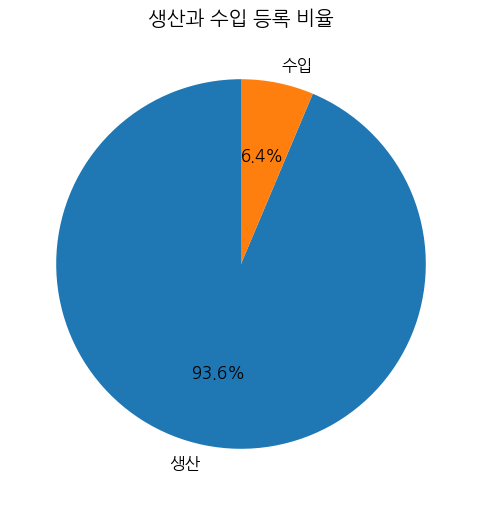

In [22]:
# 생산수입구분별 비율 계산
category_counts = data['생산수입구분'].value_counts()  # 생산과 수입의 등록 수량 집계

# 파이 차트 생성
plt.figure(figsize=(6, 6))  # 차트 크기 설정
plt.pie(
    category_counts,                  # 데이터 값
    labels=category_counts.index,     # 레이블: 생산/수입 구분
    autopct='%1.1f%%',                # 퍼센트 포맷
    startangle=90                     # 차트 시작 각도
)
plt.title('생산과 수입 등록 비율')  # 제목 설정
plt.show()  # 차트 출력

<Figure size 1000x600 with 0 Axes>

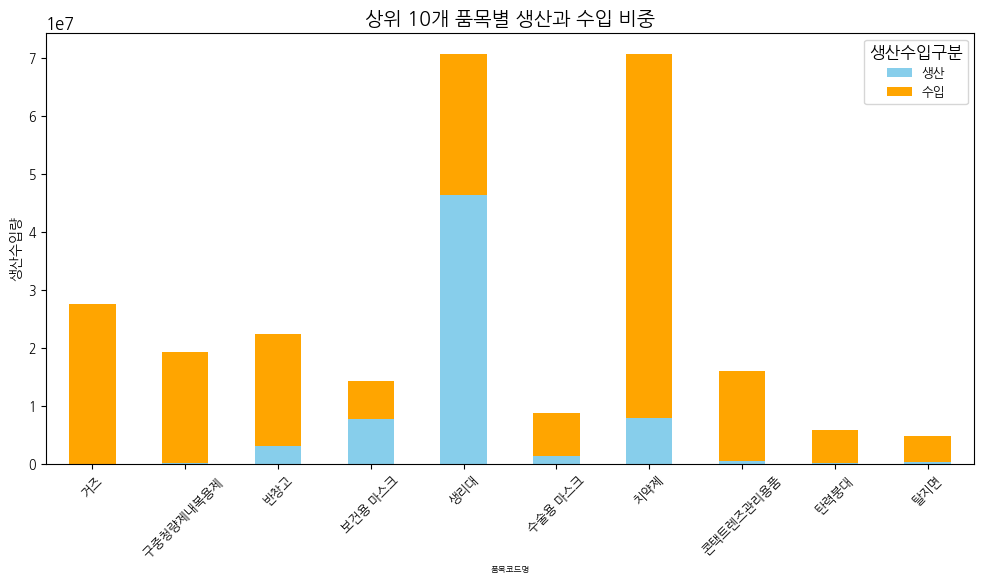

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# 품목코드가 없는 데이터 제외
filtered_data = data.dropna(subset=['품목코드명'])  # '품목코드명' 열이 결측치인 행 제거

# 품목코드별 생산과 수입 집계 (상위 10개)
top10_codes = (
    filtered_data.groupby('품목코드명')['생산수입량']
    .sum()
    .nlargest(10)
    .index  # 생산수입량이 상위 10개 품목의 '품목코드명'
)
top10_data = (
    filtered_data[filtered_data['품목코드명'].isin(top10_codes)]  # 상위 10개 품목 필터링
    .groupby(['품목코드명', '생산수입구분'])['생산수입량']
    .sum()
    .unstack(fill_value=0)  # '생산'과 '수입' 데이터를 열로 변환, 결측값은 0으로 채움
)

# X축 레이블을 10글자로 제한
top10_data.index = [str(x)[:10] for x in top10_data.index]  # 레이블 길이를 10글자로 제한

# 누적 막대그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
top10_data.plot(
    kind='bar',  # 그래프 타입: 막대그래프
    stacked=True,  # 누적형 그래프
    figsize=(10, 6),  # 그래프 크기
    color=['skyblue', 'orange']  # 색상 설정
)
plt.title('상위 10개 품목별 생산과 수입 비중', fontsize=14)  # 그래프 제목
plt.xlabel('품목코드명', fontsize=6)  # X축 라벨
plt.ylabel('생산수입량', fontsize=10)  # Y축 라벨
plt.xticks(rotation=45, fontsize=9)  # X축 라벨 회전 및 크기 설정
plt.yticks(fontsize=9)  # Y축 라벨 크기 설정
plt.legend(title='생산수입구분', labels=['생산', '수입'], fontsize=9)  # 범례 설정
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 그래프 출력

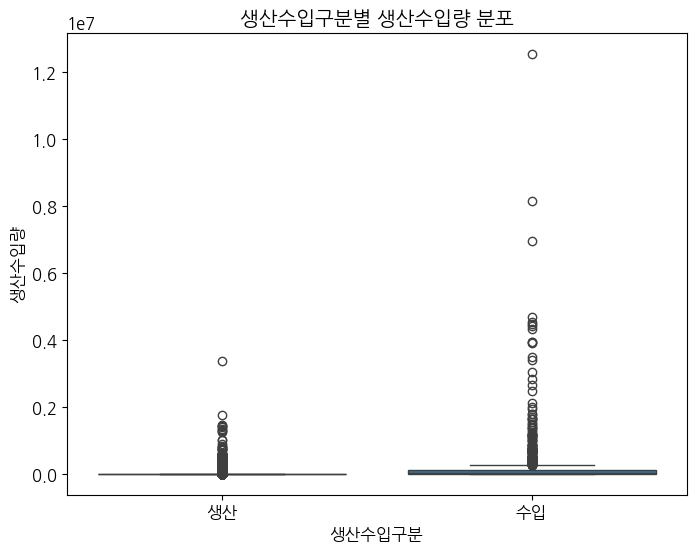

In [24]:
import seaborn as sns  # Seaborn 임포트

# Box Plot 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 설정 (가로 8, 세로 6)
sns.boxplot(data=data, x='생산수입구분', y='생산수입량')  # Box Plot 생성
plt.title('생산수입구분별 생산수입량 분포')  # 그래프 제목 설정
plt.xlabel('생산수입구분')  # X축 라벨 설정
plt.ylabel('생산수입량')  # Y축 라벨 설정
plt.show()  # 그래프 출력

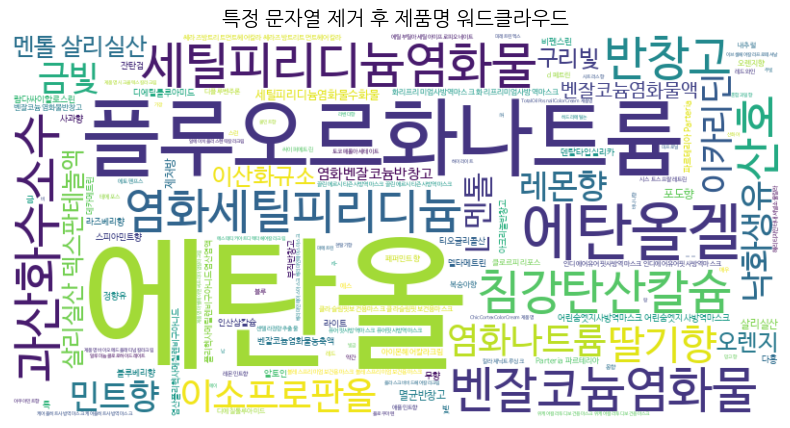

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# CSV 파일 불러오기
# 데이터셋을 pandas DataFrame으로 읽어옵니다.
# 경로를 사용하여 '제품명' 열이 포함된 데이터를 불러옵니다.
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")  # 데이터를 불러올 CSV 파일 경로 지정

# 제거할 패턴 정의
# 워드 클라우드 생성 시 제외하고자 하는 특정 단어 패턴들을 정의합니다.
exclude_patterns = ["짙은", "삭제", "아주", "AD", "KF", "끈", "소형", "중형", "대형", "수출용", "수출명", "란", "검은", "록", "밤", "분홍", "내추렬", "내츄럴", "보라", "청", "자", "적", "녹",
                    "다크", "브라운", "노", "초", "백", "연", "진", "어두운", "자연", "한", "화이트", "밝은", "진한", "갈색", "수출형", "회용", "색", "회", "상아", "황", "흑", "블랙", "흰", "검정"]  # 제거할 단어 패턴 목록

def remove_patterns(text, patterns):
    """
    주어진 텍스트에서 특정 패턴만 제거하고 나머지는 유지.

    Parameters:
    text (str): 입력 문자열
    patterns (list): 제거할 문자열 패턴 리스트

    Returns:
    str: 패턴이 제거된 문자열
    """
    for pattern in patterns:
        # 정규식을 활용하여 특정 패턴을 공백으로 대체합니다.
        text = re.sub(pattern, "", text)
    return text.strip()  # 문자열 양쪽 공백 제거 후 반환

# "제품명" 데이터에서 특정 패턴 제거
# DataFrame의 '제품명' 열에서 패턴 제거 작업을 수행하여 새로운 열을 추가합니다.
data["정제된_제품명"] = data["제품명"].apply(lambda x: remove_patterns(x, exclude_patterns))

# 워드 클라우드용 텍스트 생성
# 정제된 '정제된_제품명' 열의 모든 데이터를 하나의 문자열로 결합하여 워드 클라우드에 활용합니다.
text_data = " ".join(data["정제된_제품명"])

# 워드 클라우드 생성
# WordCloud 객체를 생성하며 폰트, 배경색, 이미지 크기를 설정합니다.
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 한글 폰트를 설정합니다.
    background_color='white',  # 배경색을 흰색으로 설정합니다.
    width=800,  # 이미지 너비
    height=400  # 이미지 높이
).generate(text_data)  # 정제된 텍스트 데이터를 바탕으로 워드 클라우드를 생성합니다.

# 시각화
# 워드 클라우드를 화면에 표시합니다.
plt.figure(figsize=(10, 5))  # 그림 크기를 설정합니다.
plt.imshow(wordcloud, interpolation='bilinear')  # 워드 클라우드 이미지를 표시합니다.
plt.axis('off')  # 축을 제거하여 깔끔하게 표시합니다.
plt.title('특정 문자열 제거 후 제품명 워드클라우드')  # 제목을 추가합니다.
plt.show()  # 시각화를 실행합니다.

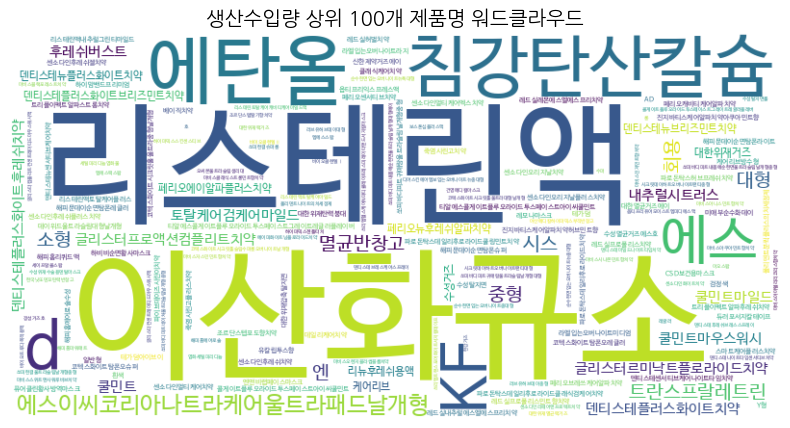

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# CSV 파일 불러오기
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")  # 데이터 파일 경로 지정

# '생산수입량'이 큰 상위 10개의 오브젝트 추출
top_data = data.nlargest(100, '생산수입량')

# 제거할 패턴 정의
exclude_patterns = []

def remove_patterns(text, patterns):
    """
    주어진 텍스트에서 특정 패턴만 제거하고 나머지는 유지.
    """
    for pattern in patterns:
        text = re.sub(pattern, "", text)  # 패턴 제거
    return text.strip()  # 문자열 양쪽 공백 제거 후 반환

# '제품명' 데이터에서 특정 패턴 제거
top_data["정제된_제품명"] = top_data["제품명"].apply(lambda x: remove_patterns(x, exclude_patterns))

# 워드 클라우드용 텍스트 생성
text_data_top = " ".join(top_data["정제된_제품명"])

# 워드 클라우드 생성
wordcloud_top = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # 한글 폰트 경로 설정
    background_color='white',  # 배경색 설정
    width=800,  # 이미지 너비
    height=400  # 이미지 높이
).generate(text_data_top)

# 시각화
plt.figure(figsize=(10, 5))  # 그림 크기 설정
plt.imshow(wordcloud_top, interpolation='bilinear')  # 워드 클라우드 표시
plt.axis('off')  # 축 제거
plt.title('생산수입량 상위 100개 제품명 워드클라우드')  # 제목 추가
plt.show()  # 시각화 실행

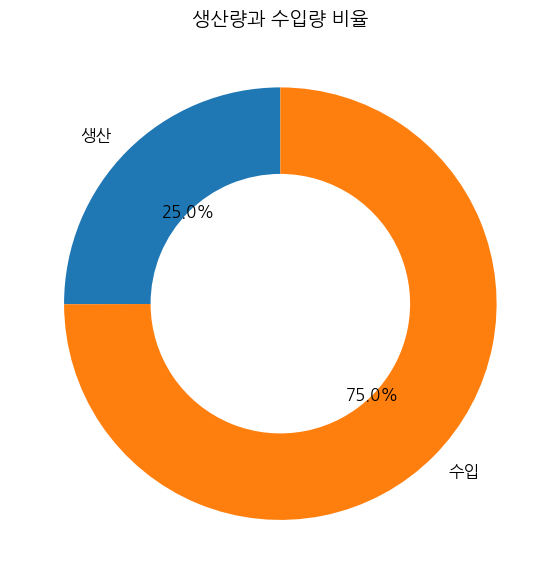

In [28]:
# 생산량과 수입량 비율 계산
# 'filtered_data' DataFrame에서 '생산수입구분'에 따라 '생산수입량'을 합산합니다.
# '생산수입구분'은 생산과 수입을 구분하며, 각 그룹의 총량을 계산합니다.
category_totals = filtered_data.groupby('생산수입구분')['생산수입량'].sum()

# 도넛 차트 생성
# 비율을 파악하기 위해 파이 차트를 도넛 형식으로 변형하여 생성합니다.
plt.figure(figsize=(6, 6))  # 그래프의 크기를 설정합니다 (6x6 인치).
plt.pie(
    category_totals,               # 각 카테고리별 총량 데이터를 전달.
    labels=category_totals.index,  # 각 섹션에 '생산수입구분' 이름을 표시.
    autopct='%1.1f%%',             # 섹션별 비율을 소수점 첫째 자리까지 표시.
    startangle=90,                 # 그래프 시작 각도를 90도로 설정하여 정렬.
    wedgeprops=dict(width=0.4)     # 파이 차트를 도넛 형태로 만들기 위해 내부 반지름 설정.
)
plt.title('생산량과 수입량 비율', fontsize=14)  # 그래프 제목을 추가하고 글자 크기를 설정합니다.
plt.tight_layout()  # 레이아웃을 자동으로 조정하여 그래프가 깔끔하게 보이도록 설정합니다.
plt.show()  # 그래프를 화면에 출력합니다.

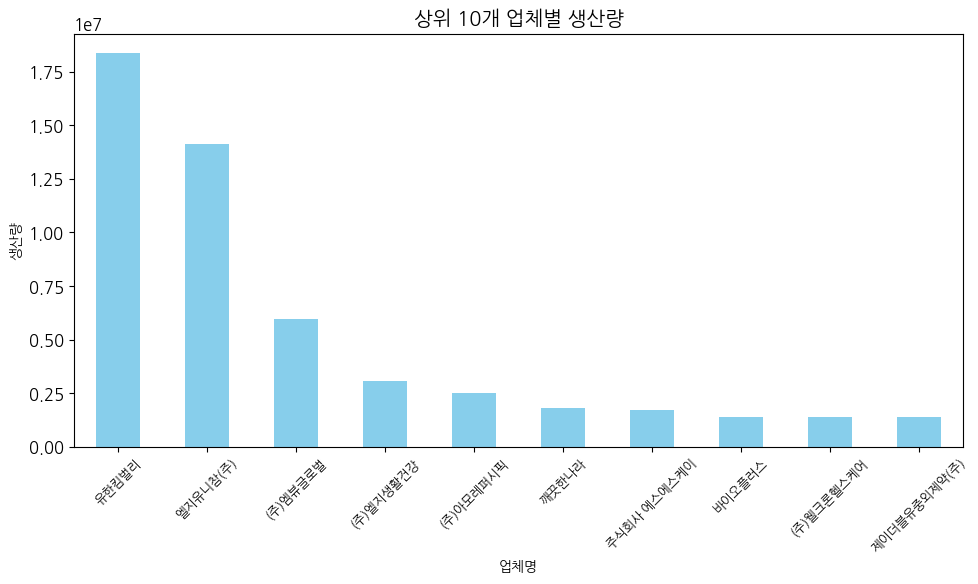

In [29]:
# 업체별 생산량 상위 10개 집계
# 'filtered_data' DataFrame에서 '생산수입구분'이 '생산'인 데이터를 필터링합니다.
# 그런 다음, '업체명'별로 '생산수입량'을 합산하여 상위 10개 업체를 추출합니다.
top10_companies = (
    filtered_data[filtered_data['생산수입구분'] == '생산']  # '생산'으로 필터링
    .groupby('업체명')['생산수입량']                      # '업체명'별로 그룹화하여 '생산수입량' 합산
    .sum()                                              # 합계를 계산
    .nlargest(10)                                       # 상위 10개 업체 추출
)

# 막대 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기를 설정 (가로 10인치, 세로 6인치).
top10_companies.plot(kind='bar', color='skyblue')  # 막대그래프 생성, 색상은 'skyblue'로 설정.
plt.title('상위 10개 업체별 생산량')  # 그래프 제목 설정.
plt.xlabel('업체명', fontsize=10)  # X축 레이블과 글꼴 크기 설정.
plt.ylabel('생산량', fontsize=10)  # Y축 레이블과 글꼴 크기 설정.
plt.xticks(rotation=45, fontsize=9)  # X축 레이블을 45도 회전하고 글꼴 크기를 설정.
plt.tight_layout()  # 그래프 레이아웃을 조정하여 깔끔하게 보이도록 설정.
plt.show()  # 그래프를 화면에 출력.

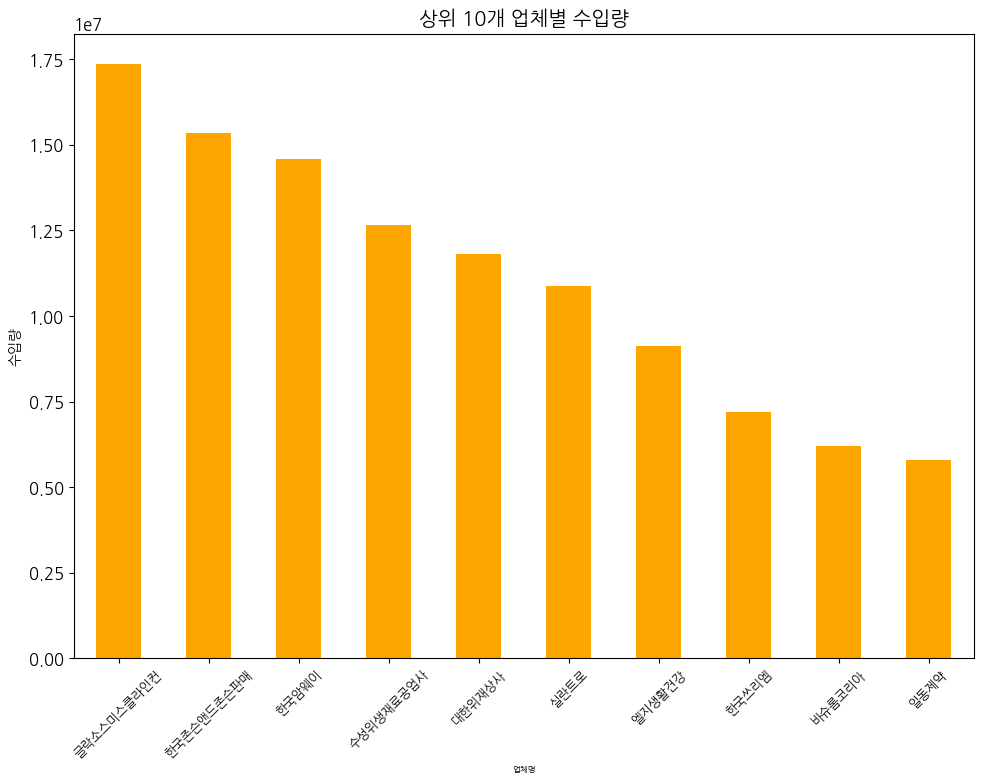

In [30]:
# 업체별 수입량 상위 10개 집계
# 'filtered_data' DataFrame에서 '생산수입구분'이 '수입'인 데이터를 필터링합니다.
# 그런 다음, '업체명'별로 '생산수입량'을 합산하여 상위 10개 업체를 추출합니다.
top10_companies = (
    filtered_data[filtered_data['생산수입구분'] == '수입']  # '수입'으로 필터링
    .groupby('업체명')['생산수입량']                      # '업체명'별로 그룹화하여 '생산수입량' 합산
    .sum()                                              # 합계를 계산
    .nlargest(10)                                       # 상위 10개 업체 추출
)

# X축 레이블을 10글자로 제한
# 긴 업체명을 읽기 쉽게 하기 위해 X축 레이블을 10글자로 제한합니다.
top10_companies.index = [str(x)[:10] for x in top10_companies.index]

# 막대 그래프 생성
plt.figure(figsize=(10, 8))  # 그래프 크기를 설정 (가로 10인치, 세로 8인치).
top10_companies.plot(kind='bar', color='orange')  # 막대그래프 생성, 색상은 'orange'로 설정.
plt.title('상위 10개 업체별 수입량')  # 그래프 제목 설정.
plt.xlabel('업체명', fontsize=6)  # X축 레이블과 글꼴 크기 설정.
plt.ylabel('수입량', fontsize=10)  # Y축 레이블과 글꼴 크기 설정.
plt.xticks(rotation=45, fontsize=9)  # X축 레이블을 45도 회전하고 글꼴 크기를 설정.
plt.tight_layout()  # 그래프 레이아웃을 조정하여 깔끔하게 보이도록 설정.
plt.show()  # 그래프를 화면에 출력.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

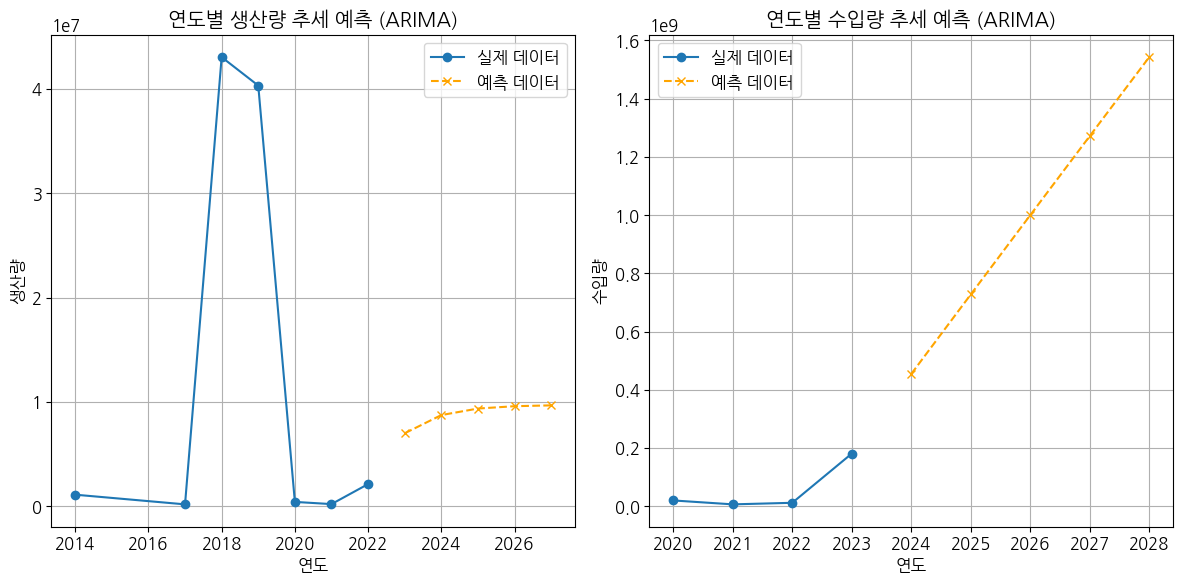

In [31]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")  # CSV 파일에서 데이터를 불러옴

# 데이터 전처리
data['SM_YEAR'] = data['생산수입연도'].astype(int)  # '생산수입연도'를 정수형(int)으로 변환하여 'SM_YEAR' 열 생성
data['AMT'] = data['생산수입량'].astype(float)      # '생산수입량'을 실수형(float)으로 변환하여 'AMT' 열 생성

# 생산량 데이터 추출
# '생산수입구분'이 '생산'인 데이터를 연도별로 그룹화하여 생산량 합계를 계산
생산량 = data[data['생산수입구분'] == '생산'].groupby('SM_YEAR')['AMT'].sum()

# 수입량 데이터 추출
# '생산수입구분'이 '수입'인 데이터를 연도별로 그룹화하여 수입량 합계를 계산
수입량 = data[data['생산수입구분'] == '수입'].groupby('SM_YEAR')['AMT'].sum()

# ARIMA 모델 학습 및 예측 함수 정의
def forecast_arima(data_series, steps=5):
    """
    ARIMA 모델을 사용하여 시간 시계열 데이터를 예측하는 함수.

    Parameters:
        data_series (pd.Series): 예측할 데이터 시계열
        steps (int): 예측할 미래 데이터 포인트 수

    Returns:
        forecast_years (range): 예측 연도
        forecast (np.ndarray): 예측된 값
    """
    model = ARIMA(data_series, order=(1, 1, 1))  # ARIMA 모델 설정: p=1, d=1, q=1
    model_fit = model.fit()                      # 모델 학습
    forecast = model_fit.forecast(steps=steps)   # 미래 데이터 예측
    forecast_years = range(data_series.index[-1] + 1, data_series.index[-1] + 1 + steps)  # 예측 연도 계산
    return forecast_years, forecast

# 생산량 데이터로 ARIMA 모델 학습 및 예측
생산_예측_연도, 생산_예측 = forecast_arima(생산량)

# 수입량 데이터로 ARIMA 모델 학습 및 예측
수입_예측_연도, 수입_예측 = forecast_arima(수입량)

# 결과 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 설정 (가로 12인치, 세로 6인치)

# 생산량 추세 그래프
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 서브플롯
plt.plot(생산량.index, 생산량.values, label='실제 데이터', marker='o')  # 실제 데이터
plt.plot(생산_예측_연도, 생산_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')  # 예측 데이터
plt.title("연도별 생산량 추세 예측 (ARIMA)")  # 그래프 제목
plt.xlabel("연도")                          # X축 라벨
plt.ylabel("생산량")                        # Y축 라벨
plt.legend()                                # 범례 추가
plt.grid()                                  # 격자 추가

# 수입량 추세 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 서브플롯
plt.plot(수입량.index, 수입량.values, label='실제 데이터', marker='o')  # 실제 데이터
plt.plot(수입_예측_연도, 수입_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')  # 예측 데이터
plt.title("연도별 수입량 추세 예측 (ARIMA)")  # 그래프 제목
plt.xlabel("연도")                          # X축 라벨
plt.ylabel("수입량")                        # Y축 라벨
plt.legend()                                # 범례 추가
plt.grid()                                  # 격자 추가

plt.tight_layout()  # 그래프 간격을 자동으로 조정하여 깔끔하게 표시
plt.show()          # 그래프 출력

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0872  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0803     
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1295 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0794 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1243 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0849 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1791 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1650 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0887 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2581 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2416 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1516 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0666 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0925 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1186 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.0022
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9742
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9461
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.9173
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.8878
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8572
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.8254
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.7923
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7578
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7218
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6841
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6448
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6037
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.5610
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5166
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/st

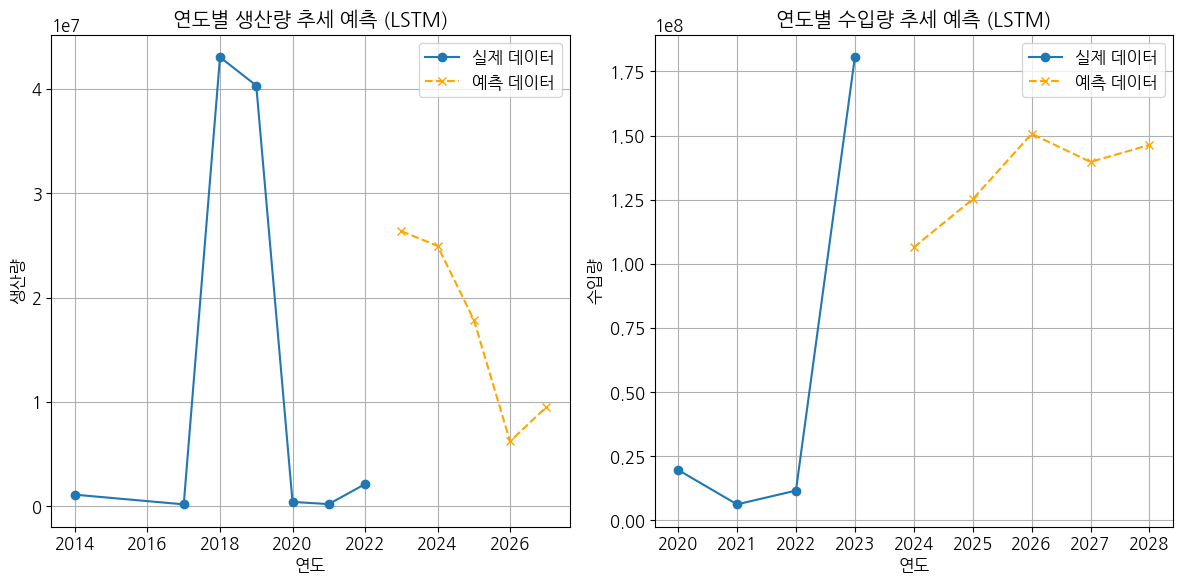

In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 데이터 정규화 및 시계열 데이터 준비
def prepare_data(data_series, look_back=3):
    """
    시계열 데이터를 정규화하고 LSTM 모델 입력 형식에 맞게 변환.

    Parameters:
        data_series (pd.Series): 시계열 데이터
        look_back (int): 이전 시점 데이터의 개수 (LSTM 입력 시퀀스 길이)

    Returns:
        X (np.array): 입력 데이터 (3D 형태)
        Y (np.array): 타겟 데이터
        scaler (MinMaxScaler): 데이터 역정규화를 위한 스케일러
    """
    # 데이터 정규화 (0~1 범위)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

    X, Y = [], []
    # look_back 만큼의 이전 데이터를 사용해 예측 대상 준비
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:i + look_back, 0])  # 입력 데이터
        Y.append(scaled_data[i + look_back, 0])   # 출력 데이터 (타겟)
    X = np.array(X)
    Y = np.array(Y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM 입력에 맞게 3D로 변환
    return X, Y, scaler

# LSTM 모델 정의
def build_lstm_model(input_shape):
    """
    LSTM 모델을 정의하고 컴파일.

    Parameters:
        input_shape (tuple): 입력 데이터의 형태 (time steps, features)

    Returns:
        model (Sequential): 컴파일된 LSTM 모델
    """
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))  # 첫 번째 LSTM 층
    model.add(LSTM(50, return_sequences=False))                         # 두 번째 LSTM 층
    model.add(Dense(25))                                                # Fully Connected Layer
    model.add(Dense(1))                                                 # 출력 Layer
    model.compile(optimizer='adam', loss='mean_squared_error')          # 모델 컴파일
    return model

# LSTM 학습 및 예측
def forecast_lstm(data_series, look_back=3, steps=5):
    """
    LSTM 모델을 사용해 시계열 데이터 예측.

    Parameters:
        data_series (pd.Series): 예측 대상 시계열 데이터
        look_back (int): 이전 시점 데이터의 개수
        steps (int): 예측할 미래 시점의 수

    Returns:
        forecast_years (range): 예측 연도
        predicted (np.array): 예측된 값
    """
    # 데이터 준비
    X, Y, scaler = prepare_data(data_series, look_back)
    # LSTM 모델 생성
    model = build_lstm_model((look_back, 1))
    # 모델 학습
    model.fit(X, Y, batch_size=1, epochs=20)

    # 미래 예측
    last_sequence = scaler.transform(data_series.values[-look_back:].reshape(-1, 1))  # 마지막 시퀀스를 정규화
    future_X = last_sequence.reshape(1, look_back, 1)
    predicted = []
    for _ in range(steps):  # 미래 steps 만큼 예측
        next_pred = model.predict(future_X)[0]  # 다음 예측값
        predicted.append(next_pred)             # 예측값 저장
        # 입력 시퀀스를 업데이트하여 다음 예측에 사용
        future_X = np.append(future_X[:, 1:, :], [[next_pred]], axis=1)

    predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))  # 역정규화
    forecast_years = range(data_series.index[-1] + 1, data_series.index[-1] + 1 + steps)
    return forecast_years, predicted

# 생산량 예측
생산_예측_연도, 생산_예측 = forecast_lstm(생산량)

# 수입량 예측
수입_예측_연도, 수입_예측 = forecast_lstm(수입량)

# 결과 시각화
plt.figure(figsize=(12, 6))  # 그래프 크기 설정

# 생산량 그래프
plt.subplot(1, 2, 1)  # 첫 번째 서브플롯
plt.plot(생산량.index, 생산량.values, label='실제 데이터', marker='o')  # 실제 데이터
plt.plot(생산_예측_연도, 생산_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')  # 예측 데이터
plt.title("연도별 생산량 추세 예측 (LSTM)")  # 그래프 제목
plt.xlabel("연도")                          # X축 라벨
plt.ylabel("생산량")                        # Y축 라벨
plt.legend()                                # 범례 추가
plt.grid()                                  # 격자 표시

# 수입량 그래프
plt.subplot(1, 2, 2)  # 두 번째 서브플롯
plt.plot(수입량.index, 수입량.values, label='실제 데이터', marker='o')  # 실제 데이터
plt.plot(수입_예측_연도, 수입_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')  # 예측 데이터
plt.title("연도별 수입량 추세 예측 (LSTM)")  # 그래프 제목
plt.xlabel("연도")                          # X축 라벨
plt.ylabel("수입량")                        # Y축 라벨
plt.legend()                                # 범례 추가
plt.grid()                                  # 격자 표시

plt.tight_layout()  # 그래프 간격 조정
plt.show()          # 그래프 출력